<a href="https://colab.research.google.com/github/muhammadfawad538/NLP/blob/main/Sentiment_Analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
from matplotlib import style, rcParams

# Set seaborn style
style.use('seaborn-v0_8-white')

# Set figure size
rcParams['figure.figsize'] = 10, 5

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [5]:
import pandas as pd

# Replace with your actual CSV file path
file_path = '/content/train.csv'

# Read the CSV
df_train = pd.read_csv(file_path, encoding='latin-1')

# Display first 5 rows
print(df_train.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

In [32]:
import pandas as pd

# Load only necessary columns
df_train = pd.read_csv("/content/train.csv", usecols=["text", "sentiment"], encoding='latin-1')

# Confirm result
print(df_train.head(10))

                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative
5  http://www.dothebouncy.com/smf - some shameles...   neutral
6  2am feedings for the baby are fun when he is a...  positive
7                                         Soooo high   neutral
8                                        Both of you   neutral
9   Journey!? Wow... u just became cooler.  hehe....  positive


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [8]:
!pip install scikit-plot

In [12]:
!pip install --upgrade scikit-plot

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import scikitplot as skplt
import seaborn as sns
#import scikitplot as skplt
import matplotlib.pyplot as plt

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

In [33]:
df_train.shape

(27481, 2)

In [34]:
df_train

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [13]:
df_train['sentiment'].value_counts()

,count
sentiment,
neutral,11118
positive,8582
negative,7781


<Axes: xlabel='count', ylabel='sentiment'>

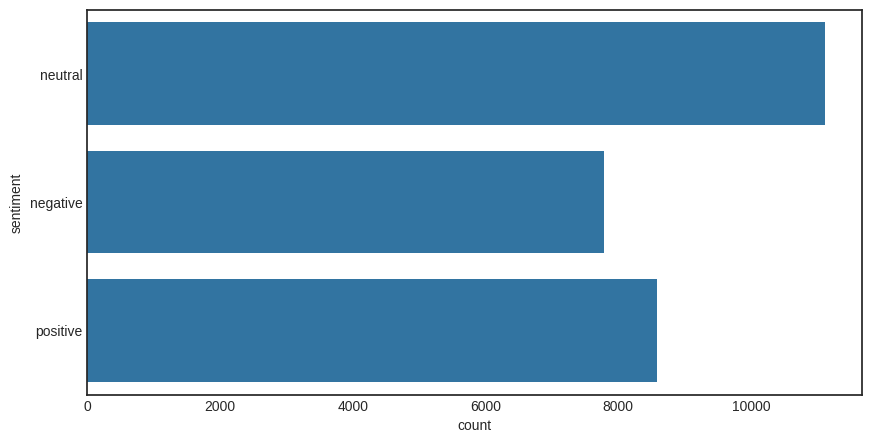

In [14]:
sns.countplot(df_train.sentiment)

In [15]:
df_train

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [35]:
# Filter out rows where sentiment is 'neutral'
dff = df_train[df_train['sentiment'] != 'neutral']

# Optional: Reset the index
dff.reset_index(drop=True, inplace=True)

# Check value counts
print(dff['sentiment'].value_counts())


sentiment
positive    8582
negative    7781
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='sentiment'>

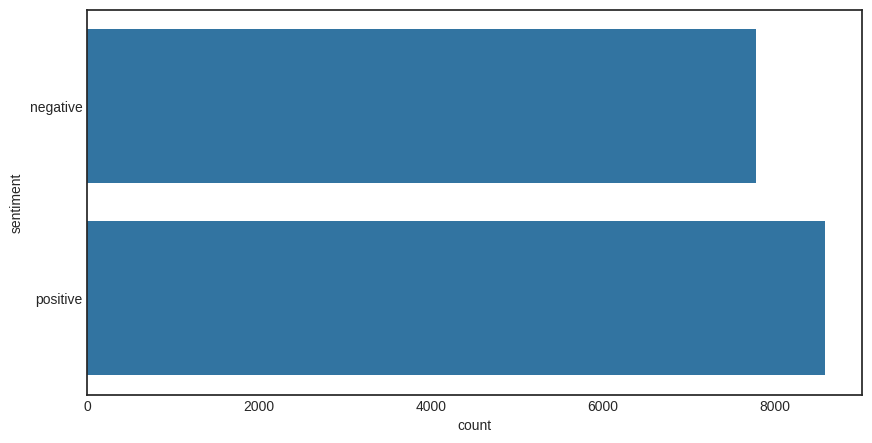

In [36]:
sns.countplot(dff.sentiment)

In [37]:
# Map sentiment labels
dff['sentiment'] = dff['sentiment'].map({'negative': 0, 'positive': 1})

# Verify the mapping
print(dff['sentiment'].value_counts())


sentiment
1    8582
0    7781
Name: count, dtype: int64


In [38]:
dff

,text,sentiment
0,Sooo SAD I will miss you here in San Diego!!!,0
1,my boss is bullying me...,0
2,what interview! leave me alone,0
3,"Sons of ****, why couldn`t they put them on t...",0
4,2am feedings for the baby are fun when he is a...,1
...,...,...
16358,enjoy ur night,1
16359,wish we could come see u on Denver husband l...,0
16360,I`ve wondered about rake to. The client has ...,0
16361,Yay good for both of you. Enjoy the break - y...,1


In [39]:
import pandas as pd
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function using stemming
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove special characters, punctuation, digits, and extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(rf"[{string.punctuation}]", '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and apply stemming
    stemmed_words = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join back into a single string
    return ' '.join(stemmed_words)

# Apply preprocessing to the column
dff['text'] = dff['text'].apply(preprocess_text)

# Drop the original 'text' column if needed
#df.drop('text', axis=1, inplace=True)

# Preview
dff.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment
0,sooo sad miss san diego,0
1,boss bulli,0
2,interview leav alon,0
3,son couldnt put releas alreadi bought,0
4,feed babi fun smile coo,1


In [40]:
dff

,text,sentiment
0,sooo sad miss san diego,0
1,boss bulli,0
2,interview leav alon,0
3,son couldnt put releas alreadi bought,0
4,feed babi fun smile coo,1
...,...,...
16358,enjoy ur night,1
16359,wish could come see u denver husband lost job ...,0
16360,ive wonder rake client made clear net dont for...,0
16361,yay good enjoy break probabl need hectic weeke...,1


In [26]:
#df.drop('text', axis=1, inplace=True)


In [41]:
dff

,text,sentiment
0,sooo sad miss san diego,0
1,boss bulli,0
2,interview leav alon,0
3,son couldnt put releas alreadi bought,0
4,feed babi fun smile coo,1
...,...,...
16358,enjoy ur night,1
16359,wish could come see u denver husband lost job ...,0
16360,ive wonder rake client made clear net dont for...,0
16361,yay good enjoy break probabl need hectic weeke...,1


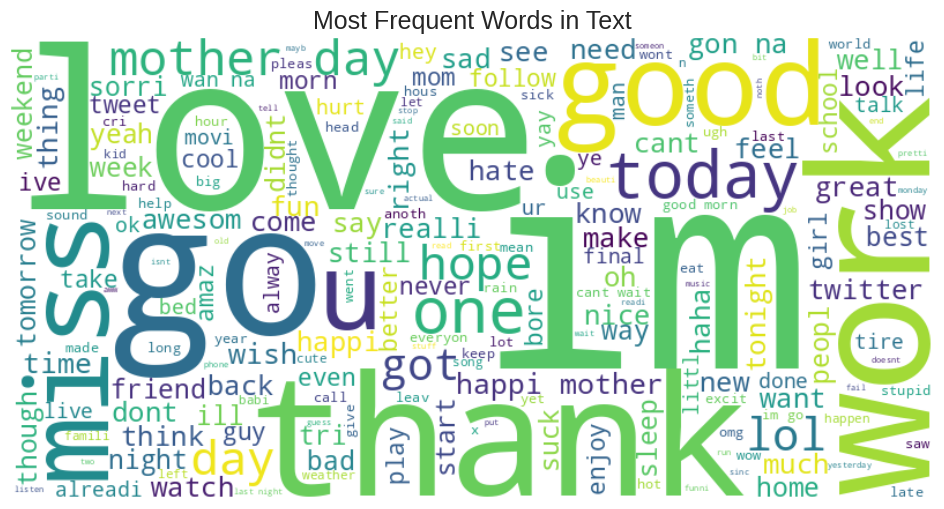

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into one string
all_text = ' '.join(dff['text'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Text", fontsize=18)
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Example: Use unigrams + bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit and transform the cleaned text
X = vectorizer.fit_transform(dff['text'])

# View feature names (words & n-grams used)
print("🔠 Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("📝 Example features:", vectorizer.get_feature_names_out()[:20])

# View the vectorized feature matrix shape
print("✅ Shape of X:", X.shape)


🔠 Vocabulary size: 88940
📝 Example features: ['aaaa' 'aaaa need' 'aaaaaaaaaahhhhhhhh' 'aaaaaaaaaahhhhhhhh im'
 'aaaaaaaaaamaz' 'aaaaaaaaaamaz sd' 'aaaaaaaafternoon'
 'aaaaaaaafternoon delight' 'aaaaaalcohol' 'aaaaall' 'aaaaall good'
 'aaaaaoouoouoouu' 'aaaaaoouoouoouu uturn' 'aaaaarrrrggghhh'
 'aaaaarrrrggghhh huge' 'aaaaawwwwwww' 'aaaaawwwwwww tell' 'aaaagggessss'
 'aaaagggessss hair' 'aaaagh']
✅ Shape of X: (16363, 88940)


In [46]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 198080 stored elements and shape (16363, 88940)>

In [47]:
import pandas as pd

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df.head()


,aaaa,aaaa need,aaaaaaaaaahhhhhhhh,aaaaaaaaaahhhhhhhh im,aaaaaaaaaamaz,aaaaaaaaaamaz sd,aaaaaaaafternoon,aaaaaaaafternoon delight,aaaaaalcohol,aaaaall,...,â½v decid,â½v got,â½you,â½you katey,â½you know,â½z,â½z dia,â½ã,â½ã â½,â½ã â½ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text column
X = vectorizer.fit_transform(dff['text'])

# Optional: get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Check the shape (samples, features)
print("Shape of vectorized data:", X.shape)


Shape of vectorized data: (16363, 16084)


In [49]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 118900 stored elements and shape (16363, 16084)>

In [50]:
# X is already defined as the vectorized text
# y will be your target labels — e.g., 0 for negative, 1 for positive

y = dff['sentiment']  # Assuming the sentiment labels are stored in 'label' column

# Check the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (16363, 16084)
y shape: (16363,)


In [51]:
y

,sentiment
0,0
1,0
2,0
3,0
4,1
...,...
16358,1
16359,0
16360,0
16361,1


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# ✅ Step 1: Vectorize text using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=3000)  # small features to make it faster
X = vectorizer.fit_transform(dff['text'])

# ✅ Step 2: Define target
y = dff['sentiment']  # 0 for negative, 1 for positive

# ✅ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 4: Define RandomForest and minimal param grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],       # reduce trees to speed up
    'max_depth': [10, None],         # keep shallow trees for speed
}

# ✅ Step 5: GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,       # verbose=2 prints too much
    n_jobs=-1        # use all available CPU cores
)

grid_search.fit(X_train, y_train)

# ✅ Step 6: Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("✅ Best Hyperparameters:", grid_search.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
✅ Accuracy: 0.8576229758631225
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1556
           1       0.86      0.87      0.86      1717

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



In [55]:
sample_reviews = [
    "This movie was absolutely fantastic! The acting, direction, and story were all perfect.",   # Positive
    "I hated every minute of this film. The plot was slow and the characters were annoying.",     # Negative
    "It was okay. Not the best I've seen, but definitely not the worst.",                         # Neutral/Mixed
    "One of the best experiences I’ve had watching a film this year!",                           # Positive
    "Terrible movie. Waste of time and money. Would not recommend to anyone.",                    # Negative
    "Amazing cinematography and brilliant performance by the lead actor.",                        # Positive
    "The movie was dull and far too long. I almost fell asleep.",                                 # Negative
    "Mediocre story but decent action scenes kept it somewhat entertaining.",                     # Mixed
    "Loved the soundtrack and visuals, but the story didn’t make much sense.",                    # Mixed
    "The director did an excellent job. Every scene was captivating and emotional."               # Positive
]


In [56]:
# Vectorize the samples
sample_features = vectorizer.transform(sample_reviews)

# Predict
predictions = best_model.predict(sample_features)

# Show predictions
for review, label in zip(sample_reviews, predictions):
    print(f"Review: {review}\nPredicted Label: {label}\n{'-'*60}")


Review: This movie was absolutely fantastic! The acting, direction, and story were all perfect.
Predicted Label: 1
------------------------------------------------------------
Review: I hated every minute of this film. The plot was slow and the characters were annoying.
Predicted Label: 0
------------------------------------------------------------
Review: It was okay. Not the best I've seen, but definitely not the worst.
Predicted Label: 1
------------------------------------------------------------
Review: One of the best experiences I’ve had watching a film this year!
Predicted Label: 1
------------------------------------------------------------
Review: Terrible movie. Waste of time and money. Would not recommend to anyone.
Predicted Label: 1
------------------------------------------------------------
Review: Amazing cinematography and brilliant performance by the lead actor.
Predicted Label: 1
------------------------------------------------------------
Review: The movie was dull

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

# 🔹 Load test data (update file path or DataFrame name accordingly)
test_df = pd.read_csv("/content/test.csv", encoding='latin-1')

# 🔹 1. Preprocessing Function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/special chars
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# 🔹 2. Clean the test data
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# 🔹 3. Use the same vectorizer used during training
X_test_new = vectorizer.transform(test_df['cleaned_text'])  # Use fitted vectorizer from training

# 🔹 4. Predict using best model (already trained)
test_predictions = best_model.predict(X_test_new)

# 🔹 5. Attach predictions back to DataFrame
test_df['predicted_label'] = test_predictions
test_df['sentiment'] = test_df['predicted_label'].map({0: 'negative', 1: 'positive'})

# 🔹 6. View or Save Results
print(test_df[['text', 'predicted_label', 'sentiment']].head())
# test_df.to_csv("test_predictions.csv", index=False)

In [ ]:
test_df

In [ ]:
# 1. Clean the test text using the same preprocessing
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# 2. Transform using the same vectorizer
X_test = vectorizer.transform(test_df['cleaned_text'])

# 3. Predict using the trained best_model
test_df['predicted_label'] = best_model.predict(X_test)

# 4. Keep only 'predicted_label' and 'cleaned_text'
test_df = test_df[['predicted_label', 'cleaned_text']]

# 5. Show or save result
print(test_df.head())
# test_df.to_csv("final_predictions.csv", index=False)


In [ ]:
X_test = vectorizer.transform(test_df['cleaned_text'])


In [ ]:
y_pred = best_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score

# Use the X_test and y_test from the train-test split
y_pred = best_model.predict(X_test)
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))